In [1]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import random
import os
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [19]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


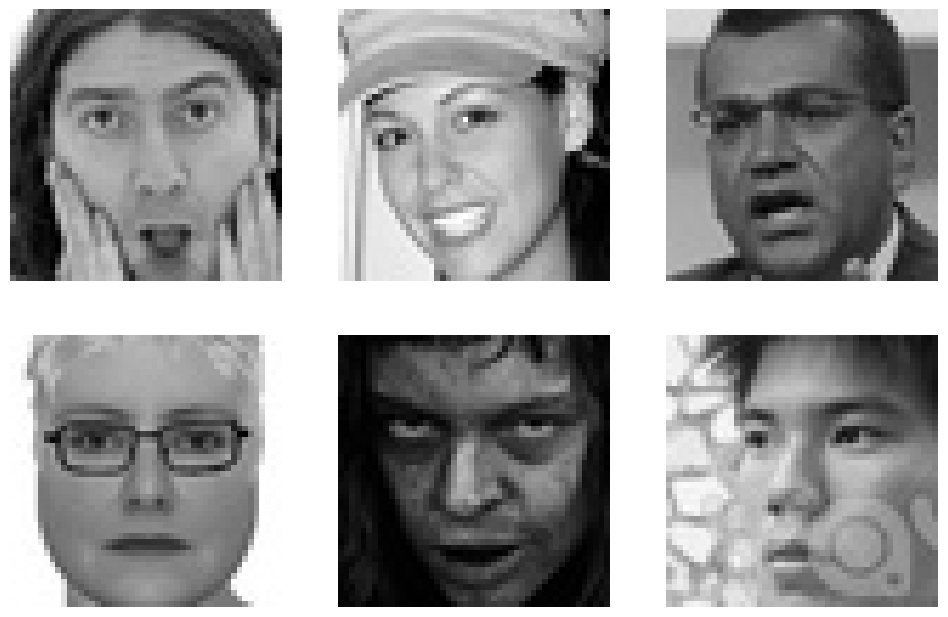

In [20]:
images = glob("/kaggle/input/fer2013/train/**/**")

plt.figure(figsize=(12,12))
for i in range(6):
    image = random.choice(images)
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

In [21]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/train",
                target_size = (img_size, img_size), color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle= True)

datagen_validation = ImageDataGenerator()

validation_generator = datagen_validation.flow_from_directory("/kaggle/input/fer2013/test",
                target_size = (img_size, img_size), color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle= True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [22]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    return x

In [23]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    return x

In [24]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(conv_1, 64, (5,5))
    conv_3 = Convolution(conv_2, 128, (3,3))


    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    output = Dense(7, activation = 'softmax')(dense_1)
    model = Model(inputs=inputs, outputs=output)
    
    opt = Adam(learning_rate = 0.0005)

    model.compile(
        loss = ['categorical_crossentropy'],
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    return model

In [25]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [26]:
epochs = 50
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint(
    'model_CNN(2)-FC(1).weights.h5',
    monitor = 'val_accuracy',
    save_weights_only = True,
    mode = 'max',
    verbose = 1
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 2,
    min_lr = 0.001
)
callbacks = [checkpoint]

In [27]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks
                    )

Epoch 1/50
  5/448 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.2154 - loss: 2.3964 

W0000 00:00:1716917452.993090     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


442/448 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3037 - loss: 1.8675

W0000 00:00:1716917482.066195     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 45s 77ms/step - accuracy: 0.3045 - loss: 1.8649 - val_accuracy: 0.3587 - val_loss: 1.7906
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5156 - loss: 1.2896
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5156 - loss: 1.2896 - val_accuracy: 0.6000 - val_loss: 1.2751
Epoch 3/50
443/448 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4475 - loss: 1.4481
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.4477 - loss: 1.4476 - val_accuracy: 0.4703 - val_loss: 1.4017
Epoch 4/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4688 - loss: 1.3940
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.4688 - loss: 1.3940 - val_accuracy: 0.5000 - val_loss: 1.3188
Epoch 5/50
442/448 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy:

In [28]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6213 - loss: 1.0678


[1.0534336566925049, 0.6258010864257812]

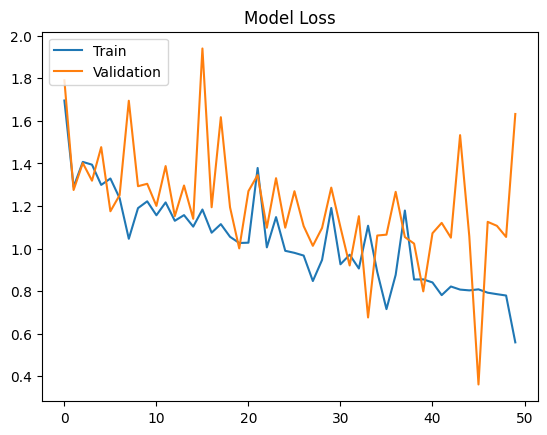

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

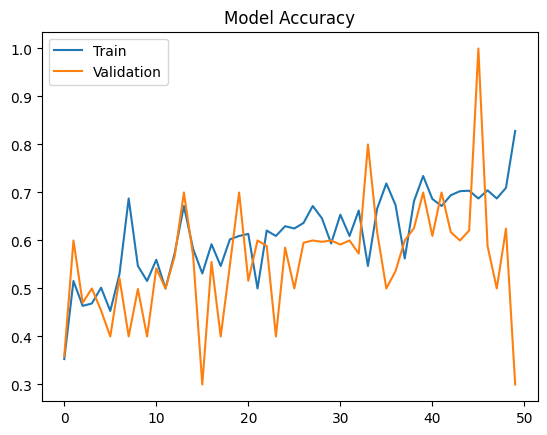

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [31]:
model_json = model.to_json()
with open ('model_a_CNN(2)-FC(1).json', 'w') as f:
    f.write(model_json)